---
Data analysis
---
1. There is a negative correlation between total number of rides per city and average fare. We could run a linear regression to help predict what the average fares would be in another state.

2. When we look at percent total fares by sector, we see that the majority of fares are in urban areas (62.7%).

3.  The urban sector has the majority of drivers (80.9%), however the rural sector has the highest average fare per city. 

In [31]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data  = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data, how="left",on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urban_rides_df = combined_df.loc[combined_df["type"] == "Urban"]
suburban_rides_df = combined_df.loc[combined_df["type"] == "Suburban"]
rural_rides_df = combined_df.loc[combined_df["type"] == "Rural"]

urban_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#calculations for urban

urban_group =  urban_rides_df.groupby(["city"])

total_fare = urban_group["fare"].sum()
total_rides = urban_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = urban_group["driver_count"].mean()

sum_urban = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_urban.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Amandaburgh,443.55,18,24.641667,12
Barajasview,557.31,22,25.332273,26
Carriemouth,764.49,27,28.314444,52
Christopherfurt,661.55,27,24.501852,41
Deanville,491.01,19,25.842632,49


In [4]:
#calculations for suburban

suburban_group =  suburban_rides_df.groupby(["city"])

total_fare = suburban_group["fare"].sum()
total_rides = suburban_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = suburban_group["driver_count"].mean()

sum_suburban = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_suburban.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Barronchester,582.76,16,36.422500,11
Bethanyland,593.21,18,32.956111,22
Brandonfort,673.31,19,35.437368,10
Colemanland,679.68,22,30.894545,23
Davidfurt,543.93,17,31.995882,23


In [5]:
#calculations for rural

rural_group =  rural_rides_df.groupby(["city"])

total_fare = rural_group["fare"].sum()
total_rides = rural_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = rural_group["driver_count"].mean()

sum_rural = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_rural.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Bradshawfurt,400.64,10,40.064000,7
Garzaport,72.37,3,24.123333,7
Harringtonfort,200.82,6,33.470000,4
Jessicaport,216.08,6,36.013333,1
Lake Jamie,206.15,6,34.358333,4


## Bubble Plot of Ride Sharing Data

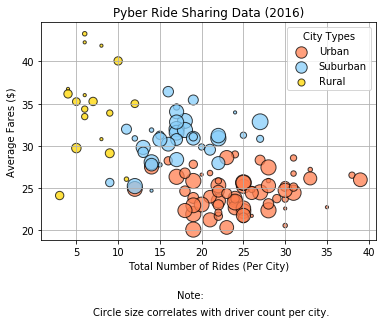

In [69]:
# Obtain the x and y coordinates for each of the three city types

urban_total_rides = sum_urban["Total Rides"]
urban_avg_fare = sum_urban["Avg Fare"]
urban_driver_count = sum_suburban["Driver Count"]*10

suburban_total_rides = sum_suburban["Total Rides"]
suburban_avg_fare = sum_suburban["Avg Fare"]
suburban_driver_count = sum_suburban["Driver Count"]*10

rural_total_rides = sum_rural["Total Rides"]
rural_avg_fare = sum_rural["Avg Fare"]
rural_driver_count = sum_rural["Driver Count"]*10


# Build the scatter plots for each city types

plt.scatter(urban_total_rides, urban_avg_fare,
            marker="o", facecolors="coral", edgecolors="black",
           alpha=0.75, s=urban_driver_count, label="Urban")

plt.scatter(suburban_total_rides, suburban_avg_fare,
            marker="o", facecolors="lightskyblue", edgecolors="black",
           alpha=0.75, s=suburban_driver_count, label="Suburban")

plt.scatter(rural_total_rides, rural_avg_fare,
            marker="o", facecolors="gold", edgecolors="black",
           alpha=0.75, s=rural_driver_count, label="Rural")


# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

# Create a legend
labels = ["Urban", "Suburban", "Rural"]

plt.legend(labels, title="City Types", loc="best", fancybox=True, scatterpoints=1)

# Incorporate a text label regarding circle size
plt.text(17, 12, 'Note:') 
plt.text(7, 10, 'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig("Images/pyber_bubble_plot.png")

In [7]:
# Show plot
plt.show()


## Total Fares by City Type

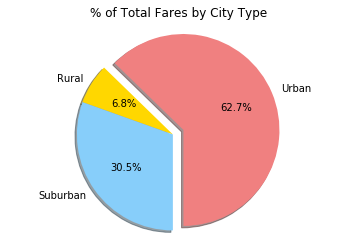

In [25]:
# Calculate Type Percents
city_type = ["Urban", "Suburban", "Rural"]
urban_percent = urban_rides_df["fare"].sum() / combined_df["fare"].sum()
suburban_percent = suburban_rides_df["fare"].sum() / combined_df["fare"].sum()
rural_percent = rural_rides_df["fare"].sum() / combined_df["fare"].sum()

percent_fares = [urban_percent, rural_percent, suburban_percent]

# Build Pie Chart

types = ["Urban", "Rural", "Suburban"]
colors= ["lightcoral","gold", "lightskyblue"]
explode = (0.12, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(percent_fares, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=-90)
plt.axis("equal")

# Save Figure
plt.savefig("Images/pyber_pie_total_fares.png")

In [9]:
# Show Figure
plt.show()


## Total Rides by City Type

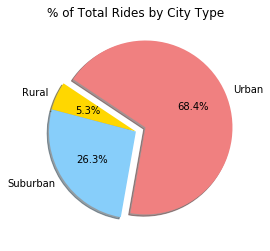

In [59]:
# Calculate Ride Percents

city_type = ["Urban", "Suburban", "Rural"]
urban_percent = sum_urban["Total Rides"].sum() / combined_df["city"].value_counts().sum()
suburban_percent = sum_suburban["Total Rides"].sum() / combined_df["city"].value_counts().sum()
rural_percent = sum_rural["Total Rides"].sum() / combined_df["city"].value_counts().sum()

percent_fares = [urban_percent, rural_percent, suburban_percent]

# Build Pie Chart

types = ["Urban", "Rural", "Suburban"]
colors= ["lightcoral","gold", "lightskyblue"]
explode = (0.12, 0, 0)

plt.title("% of Total Rides by City Type")
plt.pie(percent_fares, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("Images/pyber_pie_total_rides.png")

In [11]:
# Show Figure
plt.show()


## Total Drivers by City Type

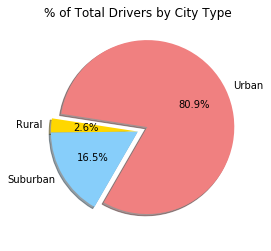

In [27]:
# Calculate Driver Percents

city_type = ["Urban", "Suburban", "Rural"]
urban_percent = sum_urban["Driver Count"].sum() / combined_df["city"].value_counts().sum()
suburban_percent = sum_suburban["Driver Count"].sum() / combined_df["city"].value_counts().sum()
rural_percent = sum_rural["Driver Count"].sum() / combined_df["city"].value_counts().sum()

percent_fares = [urban_percent, rural_percent, suburban_percent]

# Build Pie Chart

types = ["Urban", "Rural", "Suburban"]
colors= ["lightcoral","gold", "lightskyblue"]
explode = (0.12, 0, 0)

plt.title("% of Total Drivers by City Type")
plt.pie(percent_fares, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=240)

# Save Figure
plt.savefig("Images/pyber_pie_total_rides.png")

In [13]:
# Show Figure
plt.show()
